In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import gc
from tqdm import tqdm
import matplotlib.pyplot as plt

In [24]:
def find_disease(labels,disease_id,disease_array):
    
    for index,i in enumerate(labels):
        if disease_id in i:
            disease_array[index] = 1
            
    return disease_array

def load_signal(filename):
    """
    filename - str, should include data path
    """
    
    record = json.load(open(filename))

    #add info
    if record['age'] == 'NaN':
        record['age'] = -1


    #add labels
    if record['labels_SNOMEDCT'] is None:
        record['labels_SNOMEDCT'] = []
    if record['labels'] is None:
        record['labels'] = []
    if record['labels_full'] is None:
        record['labels_full'] = []
        
    ecg = np.load(filename[:-5]+'.npy')
    ecg*= record['amp_conversion']
    
    return ecg,record

In [5]:
DATASET_LIST = ['A','B','C','D','E','F']
df_general = pd.DataFrame()
    
for dataset in DATASET_LIST:
    print('Start processing dataset ',dataset)
    DATA_PATH = '../data/'+dataset+'/formatted/'

    list_records = [record for record in os.listdir(DATA_PATH) if record.find('.json') != -1]

    age = []
    gender = []
    label = []
    shape = []
    n_channels = []

    labels_SNOMEDCT = []
    labels = []
    labels_full = []

    for record in tqdm(list_records):
        record = json.load(open(DATA_PATH + record))

        #add info
        if record['age'] == 'NaN':
            record['age'] = -1

        age.append(int(record['age']))
        gender.append(record['sex'])
        label.append(record['sex'])
        shape.append(record['shape'][0])
        n_channels.append(record['shape'][1])

        #add labels
        if record['labels_SNOMEDCT'] is None:
            record['labels_SNOMEDCT'] = []
        if record['labels'] is None:
            record['labels'] = []
        if record['labels_full'] is None:
            record['labels_full'] = []

        labels_SNOMEDCT.append(record['labels_SNOMEDCT'])
        labels.append(record['labels'])
        labels_full.append(record['labels_full'])

    #list of unique diseases
    _251146004 = np.zeros((len(age)))
    _251146004 = find_disease(labels_SNOMEDCT,251146004,_251146004)

    for i in range(len(labels_SNOMEDCT)):
        for j in range(len(labels_SNOMEDCT[i])): 
            labels_SNOMEDCT[i][j] = str(labels_SNOMEDCT[i][j])

        labels_SNOMEDCT[i] = str(labels_SNOMEDCT[i])


    df = pd.DataFrame({'age': age, 
                       'gender': gender,
                       'label':label,
                       'shape':shape,
                       'n_channels':n_channels,
                       'labels_SNOMEDCT':labels_SNOMEDCT,
                        'labels':labels,
                        'labels_full':labels_full,        

    '251146004' : _251146004,
    'record_name':list_records,

    })
    df['dataset'] = dataset
    
    df_general = df_general.append(df)

  0%|          | 4/6877 [00:00<03:29, 32.86it/s]

Start processing dataset  A


  0%|          | 3/3453 [00:00<02:40, 21.55it/s]

Start processing dataset  B


  0%|          | 0/74 [00:00<?, ?it/s]

Start processing dataset  C


  0%|          | 1/516 [00:00<00:52,  9.74it/s]

Start processing dataset  D


  0%|          | 3/21837 [00:00<12:23, 29.35it/s]

Start processing dataset  E


  0%|          | 2/10344 [00:00<09:31, 18.10it/s]

Start processing dataset  F


100%|██████████| 10344/10344 [02:15<00:00, 76.36it/s]


In [6]:
df_general

,age,gender,label,shape,n_channels,labels_SNOMEDCT,labels,labels_full,251146004,record_name,dataset
0,54,male,male,8680,12,"['59118001', '284470004']","[RBBB, PAC]","[right bundle branch block, premature atrial c...",0.0,A2652.json,A
1,68,male,male,5000,12,['426783006'],[SNR],[sinus rhythm],0.0,A4228.json,A
2,40,male,male,15500,12,['59118001'],[RBBB],[right bundle branch block],0.0,A2889.json,A
3,83,male,male,5000,12,['284470004'],[PAC],[premature atrial contraction],0.0,A6312.json,A
4,22,female,female,11000,12,['59118001'],[RBBB],[right bundle branch block],0.0,A5549.json,A
...,...,...,...,...,...,...,...,...,...,...,...
10339,54,female,female,5000,12,['59931005'],[TInv],[t wave inversion],0.0,E07944.json,F
10340,55,male,male,5000,12,[],[],[],0.0,E03617.json,F
10341,61,female,female,5000,12,['426783006'],[SNR],[sinus rhythm],0.0,E07346.json,F
10342,43,female,female,5000,12,['164934002'],[TAb],[t wave abnormal],0.0,E03863.json,F


In [8]:
df_qrs = df_general[df_general['251146004'] == 1]
df_qrs

,age,gender,label,shape,n_channels,labels_SNOMEDCT,labels,labels_full,251146004,record_name,dataset
6,62,male,male,5000,12,"['251146004', '39732003', '426783006']","[LQRSV, LAD, SNR]","[low qrs voltages, left axis deviation, sinus ...",1.0,HR03158.json,E
105,76,male,male,5000,12,"['164889003', '251146004']","[AF, LQRSV]","[atrial fibrillation, low qrs voltages]",1.0,HR01164.json,E
245,83,female,female,5000,12,"['251146004', '426783006', '445118002']","[LQRSV, SNR, LAnFB]","[low qrs voltages, sinus rhythm, left anterior...",1.0,HR00348.json,E
290,62,female,female,5000,12,"['251146004', '426177001', '426783006']","[LQRSV, SB, SNR]","[low qrs voltages, sinus bradycardia, sinus rh...",1.0,HR03207.json,E
378,68,female,female,5000,12,"['251146004', '426783006']","[LQRSV, SNR]","[low qrs voltages, sinus rhythm]",1.0,HR06348.json,E
...,...,...,...,...,...,...,...,...,...,...,...
10180,58,female,female,5000,12,"['59118001', '251146004', '164934002', '111975...","[RBBB, LQRSV, TAb, LQT]","[right bundle branch block, low qrs voltages, ...",1.0,E00557.json,F
10191,49,female,female,5000,12,['251146004'],[LQRSV],[low qrs voltages],1.0,E02071.json,F
10280,68,male,male,5000,12,"['251146004', '59931005', '164934002']","[LQRSV, TInv, TAb]","[low qrs voltages, t wave inversion, t wave ab...",1.0,E09764.json,F
10309,54,male,male,5000,12,"['427084000', '251146004']","[STach, LQRSV]","[sinus tachycardia, low qrs voltages]",1.0,E03406.json,F


# Check Distribution of r peaks amplitude for low qrs amps 

In [ ]:
#check 1st lead 
lead = 1
lead-=1

amps = []

dataset = df_general['dataset'].tolist()
record_name = df_general['record_name'].tolist()
label = df_general['251146004'].values

for i in tqdm(range(df_general.shape[0])):
    ecg,record = load_signal( '../data/'+dataset[i]+'/formatted/'+record_name[i])
    rpeaks = record['rpeaks'][lead]
    amps.append(np.mean(ecg[rpeaks,lead]))
    
amps = np.array(amps)

 13%|█▎        | 5608/43101 [01:43<18:34, 33.64it/s] 

In [27]:
sns.distplot(amps[np.where(label == 0)])
sns.distplot(amps[np.where(label == 1)])

IndexError: index 1001 is out of bounds for axis 0 with size 1001

In [17]:
ecg[rpeaks].shape

(17, 12)

In [9]:
df_qrs['dataset'].unique()

array(['E', 'F'], dtype=object)

In [10]:
ecg,record = load_signal( '../data/'+'E'+'/formatted/'+'HR03158.json')

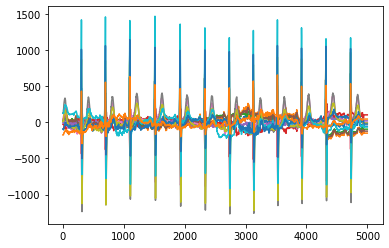

In [11]:
plt.plot(ecg)

In [12]:
record

{'filename': 'HR03158',
 'datetime': '04-Jun-2020',
 'channel_order': ['I',
  'II',
  'III',
  'aVR',
  'aVL',
  'aVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'age': '62',
 'sex': 'male',
 'amp_conversion': 200,
 'fs': 500,
 'length': 5000,
 'num_leads': 12,
 'labels_SNOMEDCT': [251146004, 39732003, 426783006],
 'labels': ['LQRSV', 'LAD', 'SNR'],
 'labels_full': ['low qrs voltages', 'left axis deviation', 'sinus rhythm'],
 'shape': [5000, 12],
 'hr': 74.87983518752273,
 'rpeaks': [[304,
   698,
   1099,
   1511,
   1926,
   2332,
   2733,
   3128,
   3523,
   3919,
   4321,
   4725],
  [303, 698, 1098, 1511, 1925, 2331, 2732, 3127, 3522, 3919, 4321, 4724],
  [312, 706, 1107, 1520, 1933, 2339, 2739, 3135, 3530, 3928, 4329, 4733],
  [304, 698, 1099, 1511, 1925, 2331, 2732, 3127, 3522, 3919, 4321, 4725],
  [305, 700, 1101, 1513, 1927, 2332, 2734, 3129, 3524, 3920, 4322, 4725],
  [313, 708, 1108, 1521, 1935, 2341, 2742, 3137, 3532, 3928, 4330, 4734],
  [311, 705, 1105, 1517, 193

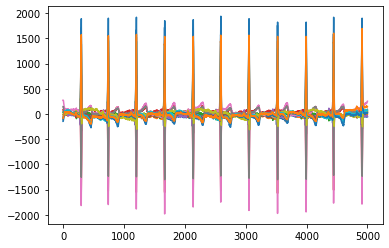

In [28]:
ecg,record = load_signal( '../data/'+'F'+'/formatted/'+'E03863.json')
plt.plot(ecg)